Problem Statement 2: For Question2 either use read_csv if file is csv ....if file is excel then use read_excel
Chandrashekhar wants to purchase office-space. He does a detailed survey of the offices and corporate complexes in the area, and tries to quantify a lot of factors, such as the distance of the offices from residential and other commercial areas, schools and workplaces; the reputation of the construction companies and builders involved in constructing the apartments; the distance of the offices from highways, freeways and important roads; the facilities around the office space and so on.
Each of these factors are quantified, normalized and mapped to values on a scale of 0 to 1. Chandrashekhar then makes a table. Each row in the table corresponds to Chandrashekhar Observations for a particular house. If Chandrashekhar has observed and noted F features, the row contains F values separated by a single space, followed by the office-space price in dollars/square-foot. If Chandrashekhar makes observations for H houses, his observation table has (F+1) columns and H rows, and a total of (F+1) * H entries.
Chandrashekhar does several such surveys and provides you with the tabulated data. At the end of these tables are some rows which have just F columns (the price per square foot is missing). Your task is to predict these prices. F can be any integer number between 1 and 5, both inclusive.
There is one important observation which Chandrashekhar has made.
The prices per square foot, are (approximately) a polynomial function of the features in the observation table. This polynomial always has an order less than 4
Input Format
The first line contains two space separated integers, F and N. Over here, F is the number of observed features. N is the number of rows for which features as well as price per square-foot have been noted.
This is followed by a table having F+1 columns and N rows with each row in a new line and each column separated by a single space. The last column is the price per square foot.
The table is immediately followed by integer T followed by T rows containing F columns.
Constraints
1 <= F <= 5
5 <= N <= 100
1 <= T <= 100
0 <= Price Per Square Foot <= 10^6 0 <= Factor Values <= 1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_excel('data_final.xlsx')

### exploring and preperaing data 

In [7]:
df.shape

(100, 3)

In [9]:
df.head()

,observation,feature,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  100 non-null    float64
 1   feature      100 non-null    float64
 2   price        100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


In [13]:
df.describe()

,observation,feature,price
count,100.000000,100.000000,100.000000
mean,0.550300,0.501700,554.214600
std,0.293841,0.307124,347.312796
min,0.010000,0.000000,42.080000
25%,0.300000,0.230000,278.172500
50%,0.570000,0.485000,514.285000
75%,0.822500,0.760000,751.752500
max,1.000000,0.990000,1563.820000


In [15]:
df.isnull().sum()

observation    0
feature        0
price          0
dtype: int64

In [16]:
df.rename(columns={'observation':'F','feature':'N'},inplace=True)

In [17]:
df

,F,N,price
0,0.44,0.68,511.14
1,0.99,0.23,717.10
2,0.84,0.29,607.91
3,0.28,0.45,270.40
4,0.07,0.83,289.88
...,...,...,...
95,0.99,0.13,636.22
96,0.28,0.46,272.12
97,0.87,0.36,696.65
98,0.23,0.87,434.53


<AxesSubplot:ylabel='Frequency'>

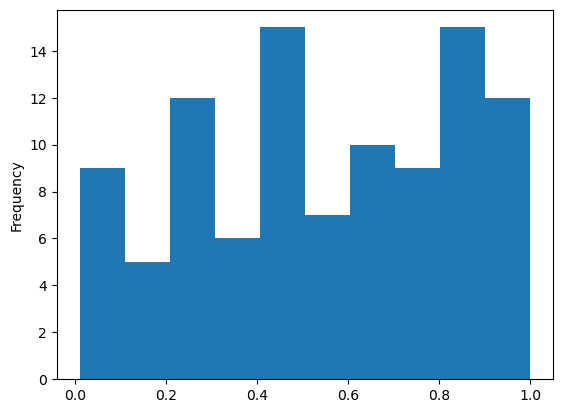

In [20]:
df['F'].plot.hist()



<AxesSubplot:ylabel='Frequency'>

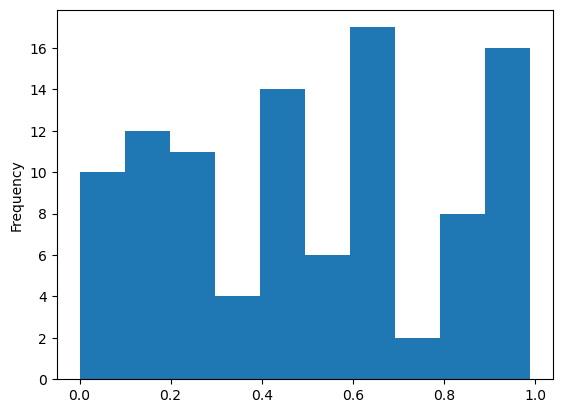

In [21]:
df['N'].plot.hist()

### model building

In [22]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=15)


In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred=model.predict(X_test)
y_pred

array([ 338.38536081,  340.90573815,  387.51458335,  718.41758759,
        304.8309516 , 1056.59765179,  245.59377849,  139.05848415,
       1104.89556229, 1166.05852742,  555.07080679,  274.79670903,
        345.25721681,  739.84356352,  714.75538493,   -5.83524735,
        196.55924663,  618.15956393,  375.24411405,  734.7554635 ,
        649.14625045,  290.22948633,  724.55282224,   81.6997577 ,
        991.772484  ])

In [31]:
#using polynomial regression
X = df.iloc[:,0].values
y = df.iloc[:,-1].values

In [34]:
X=X.reshape(-1,1)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25,random_state=15)

In [37]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
model2 = LinearRegression()
model2.fit(X_poly,y)

LinearRegression()

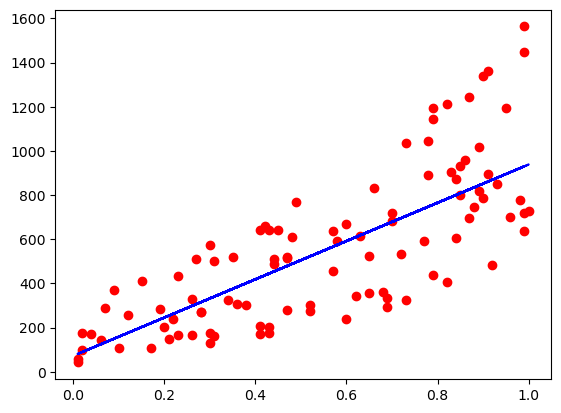

In [40]:
plt.scatter(X,y, color = 'red')
plt.plot(X,model.predict(X), color = 'blue')

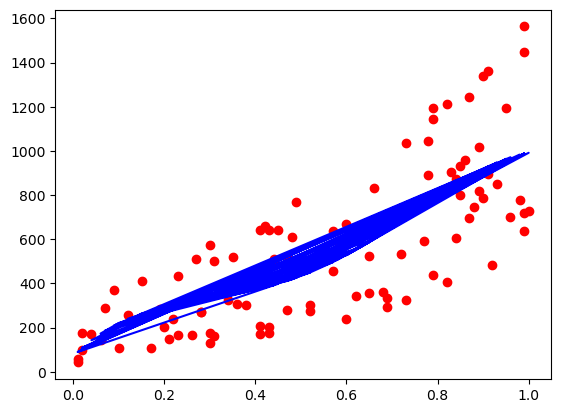

In [44]:
plt.scatter(X,y, color = 'red')
plt.plot(X,model2.predict(poly_reg.fit_transform(X)), color = 'blue')